# Análisis de los perfiles de intensidad

### Se importan las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy import signal

### Se definen funciones importantes

In [2]:
# Esta función grafica los perfiles de intensidad y sus mínimos relativos.
# Además devuelve el promedio de la distancia relativa entre los mínimos y
# su desviación estandar.

diccionario_indices_valles = {}


def scatter(dataframe, distancia, dicc, indice):
    valles = signal.argrelextrema(dataframe["Gray_Value"].values, np.less, order=22)
    indices_valles = valles[0]
    dataframe.plot(x="Distance_(mm)",
                   y="Gray_Value",
                   grid=True,
                   title=f"Perfil de Intensidad del Patrón de Interfetencia\na una distancia de {distancia}_{indice}",
                   ylabel="Intensidad Lumínica (z)",
                   xlabel="Posición [cm] (x)",
                   linewidth=0.75,
                   label="Intensidad"
                  )
    plt.plot(dataframe["Distance_(mm)"][indices_valles], dataframe["Gray_Value"][indices_valles], "x", label="mínimos relativos")
    plt.legend()
    plt.savefig(f'graficas/laser_rojo/perfil_intensidad_distancia_{distancia}_con_minimos_{indice}.png')
    plt.show()
    posiciones = dataframe["Distance_(mm)"][indices_valles]
    promedio_distancias = posiciones.diff().mean()
    desv_est_promedio_distancia = posiciones.diff().std()
  
    dicc[f"{indice}"] = promedio_distancias
    print(f"La distancia entre mínimos $\Delta z$ medida es: {promedio_distancias:.3f} +/- {desv_est_promedio_distancia:.3f} nm")
    print(f"El error porcentual es: {desv_est_promedio_distancia / promedio_distancias * 100:.3f}%")
    

In [3]:
# Devuelve la longitud de onda dada \delta z, la distancia entre rendijas y la distancia de
# la rendija a la pared donde se proyecta la interferencia.


def longitud_de_onda(delta_z, d, D):
    return delta_z * d / D

### Se leen los .csv's obtenidos

In [4]:
lista_dataframes = [pd.read_csv(f"../imagej/laser_rojo/data_perfil_intensidad/{i}.dat", sep="\t") for i in range(1, 5)]

In [5]:
lista_Distancias = [3538, 3538, 3538, 3538]

### Se muestran las gráficas con los mínimos relativos y la distancia entre estos $\Delta z$

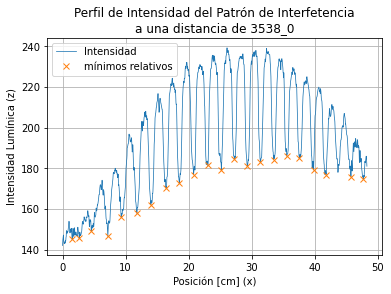

La distancia entre mínimos $\Delta z$ medida es: 2.197 +/- 0.489 nm
El error porcentual es: 22.260%


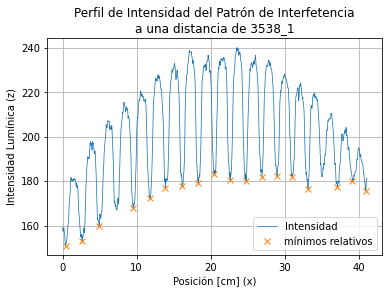

La distancia entre mínimos $\Delta z$ medida es: 2.385 +/- 0.729 nm
El error porcentual es: 30.541%


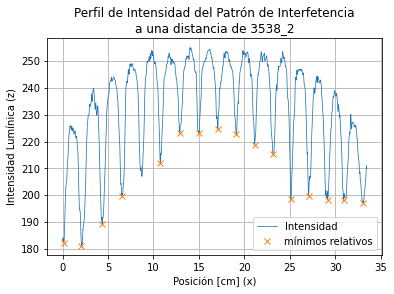

La distancia entre mínimos $\Delta z$ medida es: 2.197 +/- 0.576 nm
El error porcentual es: 26.235%


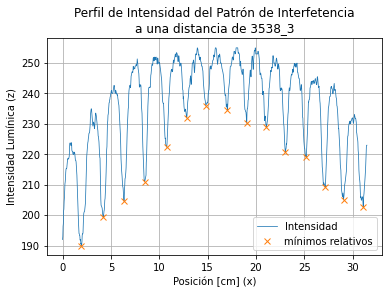

La distancia entre mínimos $\Delta z$ medida es: 2.082 +/- 0.123 nm
El error porcentual es: 5.892%


In [6]:
for i in range(4):
    scatter(lista_dataframes[i], lista_Distancias[i], diccionario_indices_valles, i)

### Se obtiene la longitud de onda del haz

$$\lambda = \frac{d\Delta z}{D}$$

donde $\Delta z$ es la distancia entre mínimos, $d$ la distancia entre rendijas y $D$ la distancia de la rendija a la pared donde se proyecta la interferencia.

In [7]:
lista_distancia_minimos = [diccionario_indices_valles[f"{i}"] for i in range(4)]

In [8]:
deltas_df = pd.DataFrame(list(zip(lista_Distancias,lista_distancia_minimos)), columns = ['Distancia_mm','Delta_z_mm'])
distancia_rendijas = 1.0

In [9]:
deltas_df["longitud_de_onda_nm"] = pd.Series(np.diag(deltas_df["Delta_z_mm"].apply(longitud_de_onda, args=(distancia_rendijas, deltas_df["Distancia_mm"], ))) * 1000000)

In [10]:
print(deltas_df.to_latex(index=False))
deltas_df

\begin{tabular}{rrr}
\toprule
 Distancia\_mm &  Delta\_z\_mm &  longitud\_de\_onda\_nm \\
\midrule
         3538 &    2.197067 &           620.991144 \\
         3538 &    2.385382 &           674.217737 \\
         3538 &    2.197340 &           621.068400 \\
         3538 &    2.081900 &           588.439796 \\
\bottomrule
\end{tabular}



,Distancia_mm,Delta_z_mm,longitud_de_onda_nm
0,3538,2.197067,620.991144
1,3538,2.385382,674.217737
2,3538,2.197340,621.068400
3,3538,2.081900,588.439796


In [95]:
promedio_total_longitud_de_onda = deltas_df["longitud_de_onda_nm"].mean()
error_longitud_de_onda = deltas_df["longitud_de_onda_nm"].std()
print(f"La longitud de onda medida es: {promedio_total_longitud_de_onda:.3f} +/- {error_longitud_de_onda:.3f} nm")
print(f"El error porcentual es: {error_longitud_de_onda / promedio_total_longitud_de_onda * 100:.3f}%")

La longitud de onda medida es: 626.179 +/- 35.520 nm
El error porcentual es: 5.672%
